In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sb

# linear models
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.anova import anova_lm

# model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# statistical distributions
from scipy.stats import t as t_distribution

In [ ]:
df=pd.read_csv('Clean_Dataset.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left   price  
0          Night           Mumbai  Economy      2.17        1.0  5953.0  
1        Morning           Mumbai  Economy      2.33        1.0  5953.0  
2  Early_Morning           Mumbai  Economy      2.17        1.0  5956.0  
3      Afternoon           Mumbai  Economy      2.25        1.0  5955.0  
4        Morning           Mumbai  Economy      2.33        1.0  5955.0

In [ ]:
df.describe()

Unnamed: 0      duration     days_left         price
count  39481.000000  39480.000000  39480.000000  39480.000000
mean   19739.000101     10.852466     24.982295   6439.796505
std    11397.327150      7.175039     13.504550   3705.879401
min        0.000000      1.920000      1.000000   1998.000000
25%     9869.000000      5.500000     14.000000   4020.000000
50%    19739.000000      9.250000     24.000000   5724.000000
75%    29609.000000     14.830000     36.000000   7425.000000
max    39479.000000     39.670000     49.000000  35145.000000

In [ ]:
!pip uninstall -y pandas-profiling

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 30.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2a960d5f0e5f192a28e5678027050f3f134e3547e6b9fb7d0dc616ebe048b9a1
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

In [ ]:
pf=ProfileReport(df)

In [ ]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = df.drop(axis = 1, columns = ['Unnamed: 0'])

In [ ]:
df=df.rename(columns={'class':'ticket_type'})

In [ ]:
df.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city ticket_type  duration  days_left   price  
0           Mumbai     Economy      2.17        1.0  5953.0  
1           Mumbai     Economy      2.33        1.0  5953.0  
2           Mumbai     Economy      2.17        1.0  5956.0  
3           Mumbai     Economy      2.25        1.0  5955.0  
4           Mumbai     Economy      2.33        1.0  5955.0

In [ ]:
cat_data = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'ticket_type']
for col in cat_data:
    print(f"Number of unique entries in {col}: {df[col].nunique()}")

Number of unique entries in airline: 6
Number of unique entries in flight: 468
Number of unique entries in source_city: 1
Number of unique entries in departure_time: 6
Number of unique entries in stops: 3
Number of unique entries in arrival_time: 6
Number of unique entries in destination_city: 5
Number of unique entries in ticket_type: 1


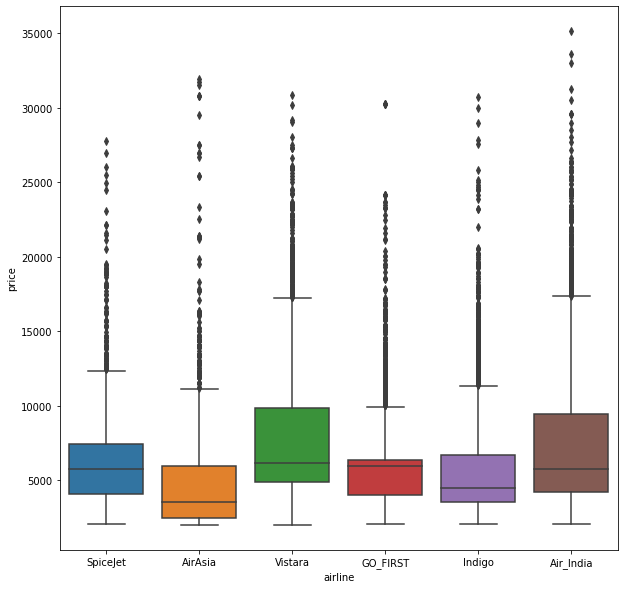

In [ ]:
figure, axes = plt.subplots(1, 1)
figure.set_figwidth(10)
figure.set_figheight(10)

sb.boxplot(data = df, x = 'airline', y = 'price', ax = axes)

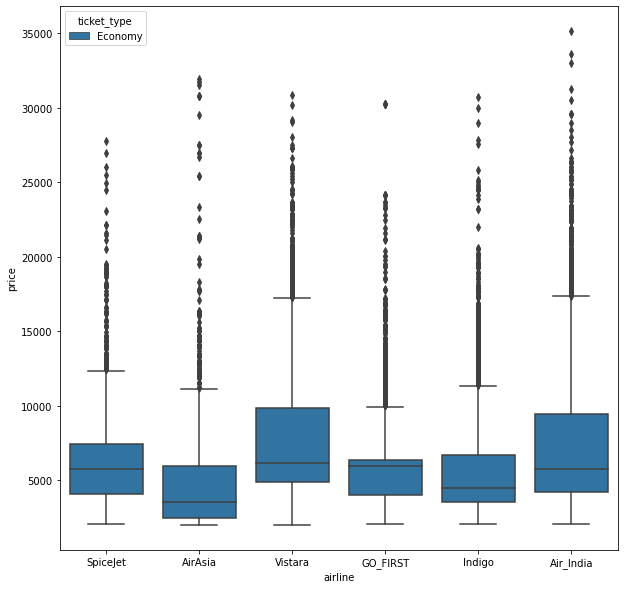

In [ ]:
figure, axes = plt.subplots(1, 1)
figure.set_figwidth(10)
figure.set_figheight(10)

sb.boxplot(data = df, x = 'airline', y = 'price', hue = 'ticket_type')

In [ ]:
lm = ols('price ~ airline', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     550.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:07:12   Log-Likelihood:            -3.7912e+05
No. Observations:               39480   AIC:                         7.583e+05
Df Residuals:                   39474   BIC:                         7.583e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4695.7780 

In [ ]:
airlines = df['airline'].unique()
dataset = [df.loc[df['airline'] == airline, 'price'] for airline in airlines]
table = pd.DataFrame(columns = ['airline 1', 'airline 2', 'degrees of freedom', 'T-test statistic', 'p value'])

for i in range(len(airlines)):
    for j in range(i + 1, len(airlines)):
        tstat, pvalue, degrees = ttest_ind(dataset[i], dataset[j], usevar = 'unequal', alternative = 'two-sided')
        table = table.append({
            'airline 1': airlines[i],
            'airline 2': airlines[j],
            'degrees of freedom': degrees,
            'T-test statistic': tstat,
            'p value': pvalue
        }, ignore_index = True)
        
table

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:135: RuntimeWarning: invalid value encountered in double_scalars
  return self.sum / self.sum_weights
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:190: RuntimeWarning: invalid value encountered in double_scalars
  return self.sumsquares / self.sum_weights


airline 1  airline 2  degrees of freedom  T-test statistic        p value
0    SpiceJet    AirAsia         4588.302545         17.005524   6.113608e-63
1    SpiceJet    Vistara         3469.556578        -15.603935   4.195082e-53
2    SpiceJet   GO_FIRST         3508.128319          4.698294   2.724126e-06
3    SpiceJet     Indigo         3491.169816          7.884536   4.186670e-15
4    SpiceJet  Air_India         4078.832891        -10.833640   5.538427e-27
5    SpiceJet        NaN                 NaN               NaN            NaN
6     AirAsia    Vistara         8005.898104        -43.040326   0.000000e+00
7     AirAsia   GO_FIRST         7597.831584        -17.471853   4.744156e-67
8     AirAsia     Indigo         7840.168497        -13.630679   7.867791e-42
9     AirAsia  Air_India         9454.058043        -35.193732  4.365759e-255
10    AirAsia        NaN                 NaN               NaN            NaN
11    Vistara   GO_FIRST        14066.556031         31.293066  7.129417e-208
12    Vistara     Indigo        17840.608230         36.520590  1.118831e-281
13    Vistara  Air_India        18824.558127          6.011361   1.873638e-09
14    Vistara        NaN                 NaN               NaN            NaN
15   GO_FIRST     Indigo        12350.191618          4.852121   1.236402e-06
16   GO_FIRST  Air_India        14313.381218        -22.332754  1.262272e-108
17   GO_FIRST        NaN                 NaN               NaN            NaN
18     Indigo  Air_India        16583.998761        -26.952099  1.252818e-156
19     Indigo        NaN                 NaN               NaN            NaN
20  Air_India        NaN                 NaN               NaN            NaN

In [ ]:
df_temp = df.copy()
df_temp['urgent'] = 'no'
df_temp.loc[df['days_left'] <= 2, 'urgent'] = 'yes'

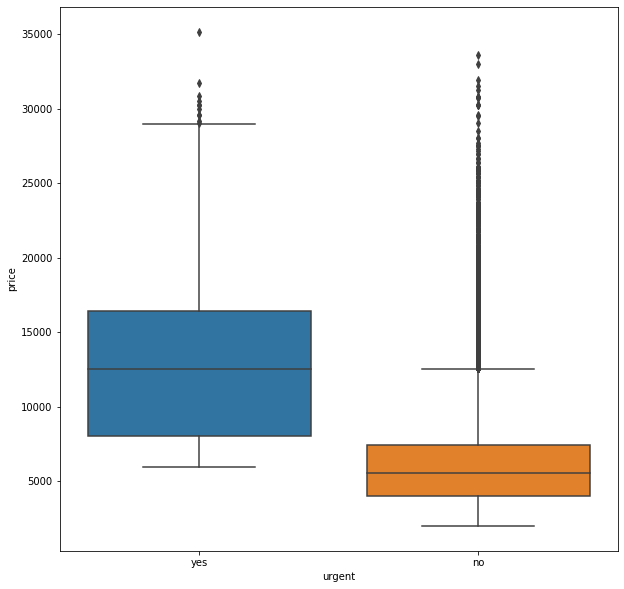

In [ ]:
figure, axes = plt.subplots(1, 1)
figure.set_figwidth(10)
figure.set_figheight(10)

sb.boxplot(data = df_temp, x = 'urgent', y = 'price')

In [ ]:
lm = ols('price ~ urgent', data = df_temp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3600.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:19:13   Log-Likelihood:            -3.7873e+05
No. Observations:               39480   AIC:                         7.575e+05
Df Residuals:                   39478   BIC:                         7.575e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6266.2178     18.088    346.433

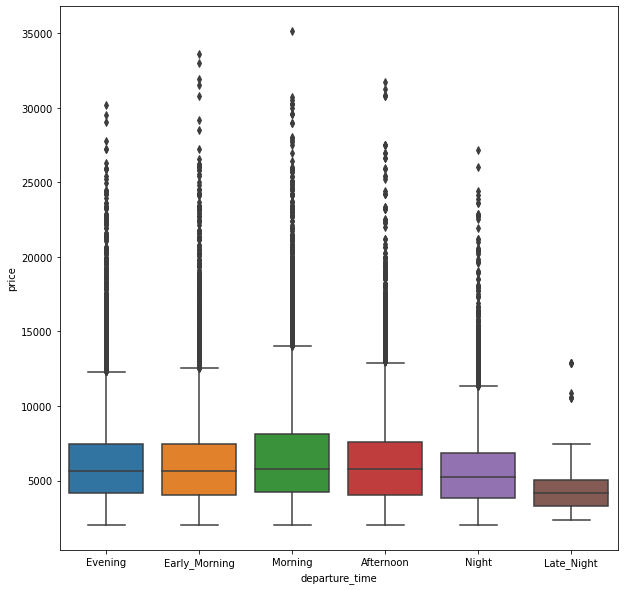

In [ ]:
figure, axes = plt.subplots(1, 1)
figure.set_figwidth(10)
figure.set_figheight(10)

sb.boxplot(data = df, x = 'departure_time', y = 'price')

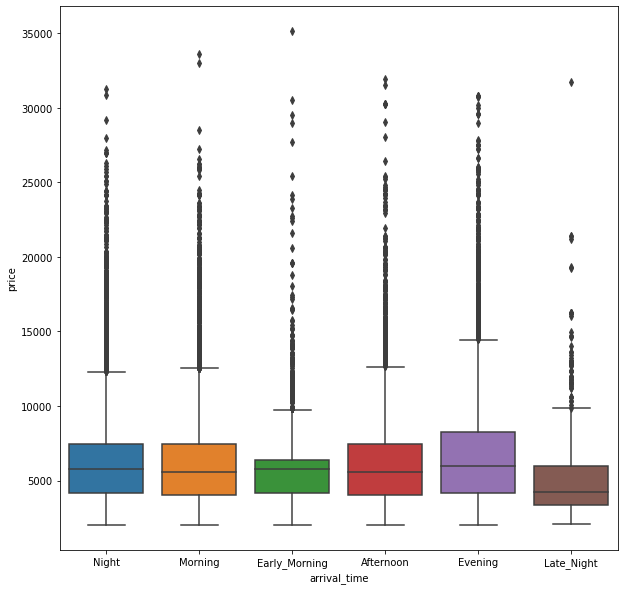

In [ ]:
figure, axes = plt.subplots(1, 1)
figure.set_figwidth(10)
figure.set_figheight(10)

sb.boxplot(data = df, x = 'arrival_time', y = 'price')

In [ ]:
anova_lm(lm)

df        sum_sq       mean_sq            F  PR(>F)
urgent        1.0  4.530760e+10  4.530760e+10  3599.777453     0.0
Residual  39478.0  4.968789e+11  1.258622e+07          NaN     NaN

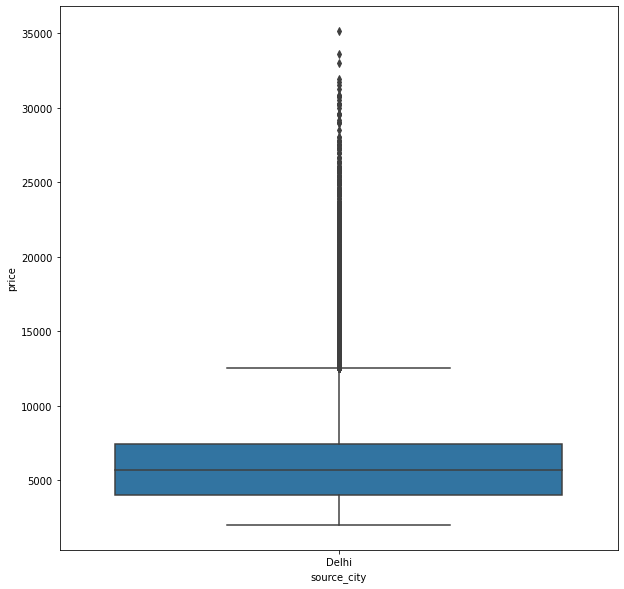

In [ ]:
figure, axes = plt.subplots(1, 1)
figure.set_figwidth(10)
figure.set_figheight(10)

sb.boxplot(data = df, x = 'source_city', y = 'price')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv")

In [ ]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
pf=ProfileReport(df)

In [ ]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pf.to_file('test.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
def describe_dataframe(df):
  # Get the list of column names from the dataframe
  columns = df.columns.tolist()

  # Print the total number of columns and their names
  print(f"No. of columns in dataframe: {len(columns)}\nColumn attributes name: {columns}")

  # Get the list of numerical column names from the dataframe using the describe method
  numerical_columns = df.describe().columns.tolist()

  # Get the list of categorical column names by subtracting the numerical columns from all columns
  categorical_columns = list(set(columns) - set(numerical_columns))

  # Print the total number and names of numerical and categorical columns
  print(f"\nNo. of numerical columns: {len(numerical_columns)}\nNumerical column names: {numerical_columns}")
  print(f"\nNo. of categorical columns: {len(categorical_columns)}\nCategorical column names: {categorical_columns}")

# Call the function and pass in the dataframe as an argument
describe_dataframe(df)

No. of columns in dataframe: 12
Column attributes name: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of numerical columns: 7
Numerical column names: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of categorical columns: 5
Categorical column names: ['ExerciseAngina', 'ChestPainType', 'ST_Slope', 'Sex', 'RestingECG']


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

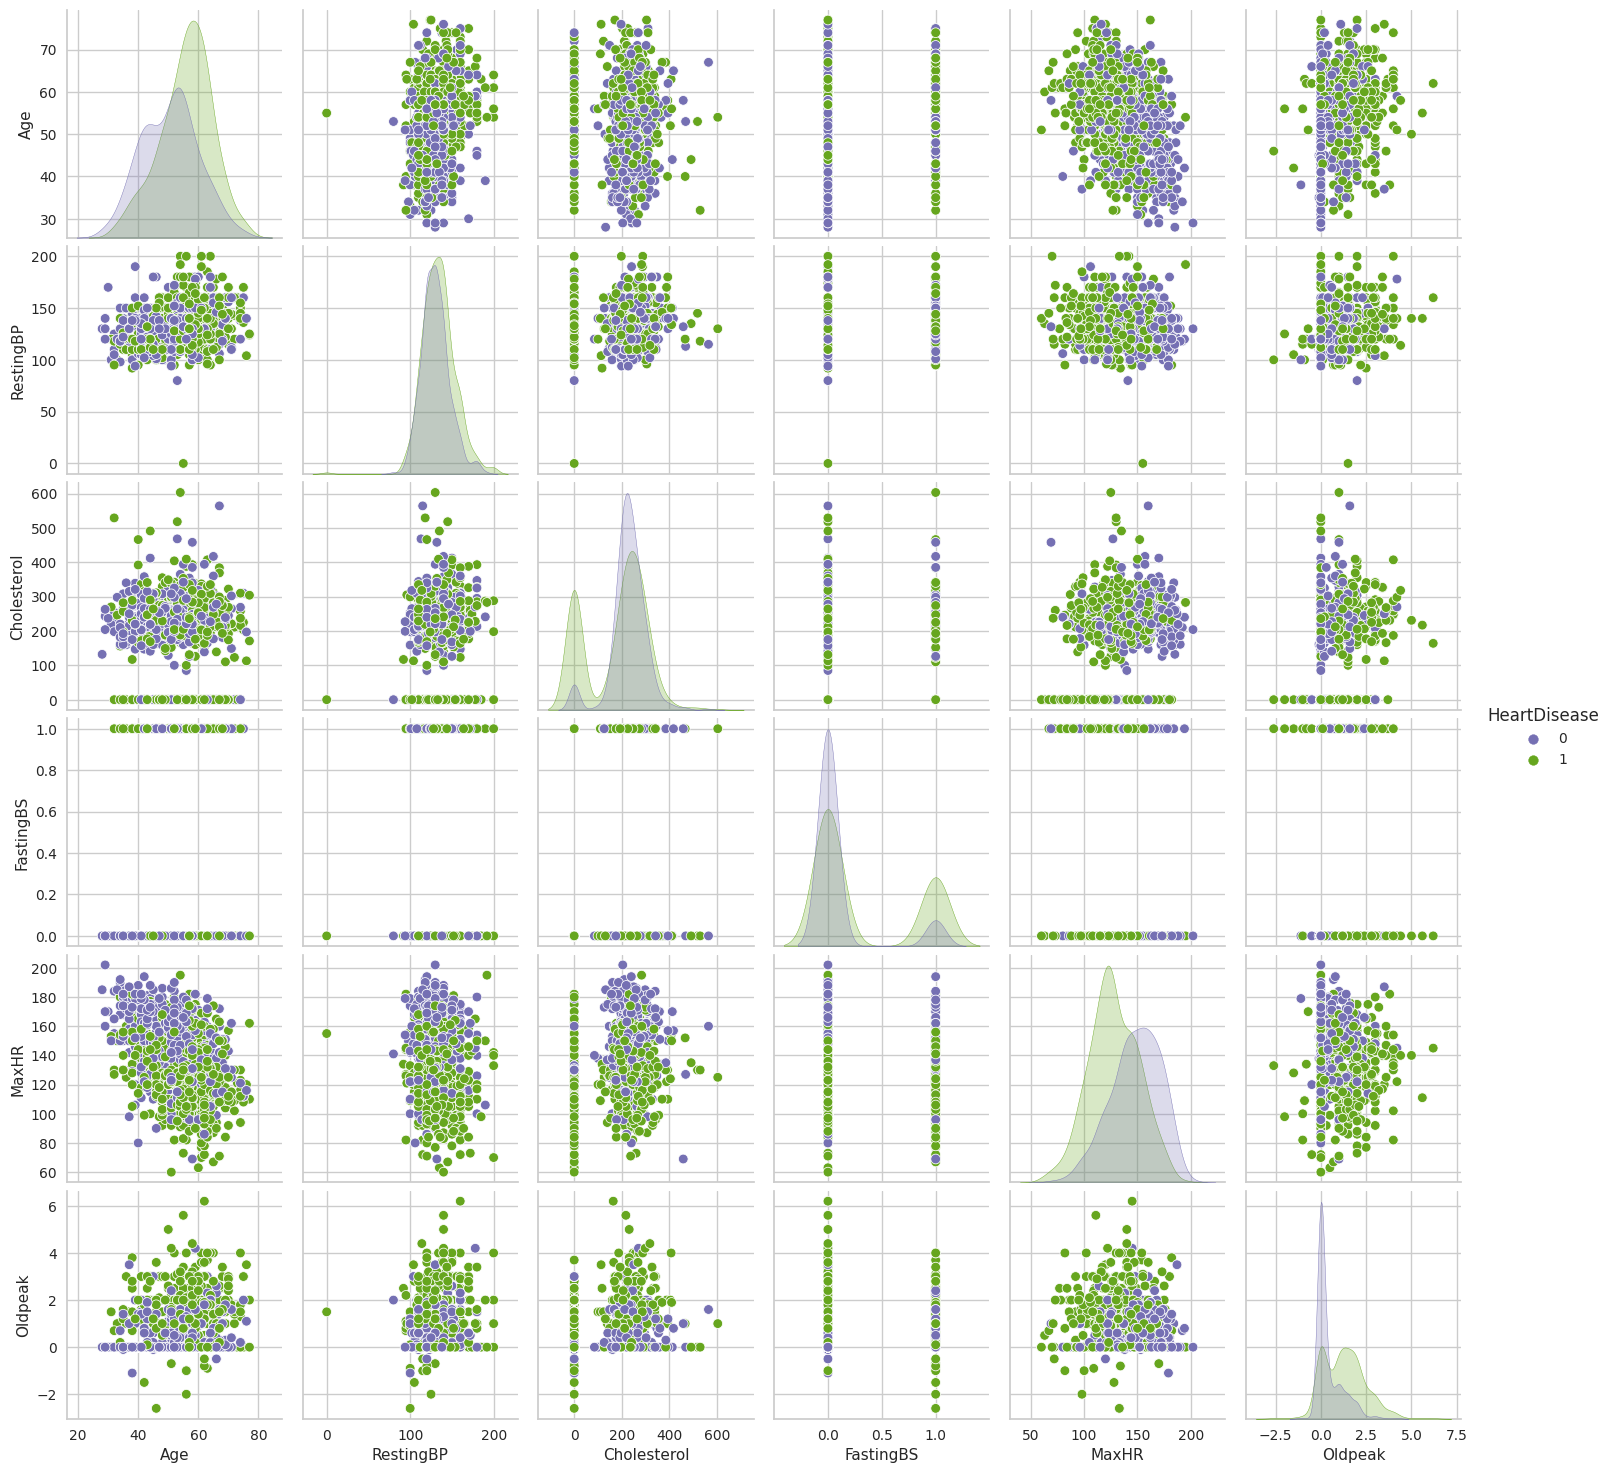

In [ ]:
sns.pairplot(df,hue='HeartDisease')

In [ ]:
df1=df.groupby('Sex').agg({'Age':'mean','ChestPainType':'count','RestingBP':'mean','Cholesterol':'mean','FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean','ST_Slope':'count','HeartDisease':'sum'})

In [ ]:
df1

Age  ChestPainType   RestingBP  Cholesterol  FastingBS  RestingECG  \
Sex                                                                             
F    52.492228            193  132.212435   241.196891         26         193   
M    53.782069            725  132.445517   187.513103        188         725   

          MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
Sex                                                                
F    146.139896             193  0.668912       193            50  
M    134.325517             725  0.945517       725           458

In [ ]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

Data Preprocessing

In [ ]:
def outliers_graph(df_column):
  Q75,Q25=np.percentile(df_column,[75,25])
  IQR=Q75-Q25

  print("Statistics for column: ", df_column.name)
  print("---------------------------")
  print("Q25: ", Q25)
  print("Q75: ", Q75)
  print("Interquartile Range: ", IQR)
  print("Outliers lie before: ", Q25-1.5*IQR, " and beyond: ", Q75+1.5*IQR)
  print("Number of rows with left extreme outliers: ", len(df[df_column < Q25-1.5*IQR]))
  print("Number of rows with right extreme outliers: ", len(df[df_column > Q75+1.5*IQR]))
  print()

In [ ]:
outliers_graph(df['Age'])

Statistics for column:  Age
---------------------------
Q25:  47.0
Q75:  60.0
Interquartile Range:  13.0
Outliers lie before:  27.5  and beyond:  79.5
Number of rows with left extreme outliers:  0
Number of rows with right extreme outliers:  0



In [ ]:
outliers_graph(df['RestingBP'])

Statistics for column:  RestingBP
---------------------------
Q25:  120.0
Q75:  140.0
Interquartile Range:  20.0
Outliers lie before:  90.0  and beyond:  170.0
Number of rows with left extreme outliers:  2
Number of rows with right extreme outliers:  26



In [ ]:
outliers_graph(df['Cholesterol'])

Statistics for column:  Cholesterol
---------------------------
Q25:  173.25
Q75:  267.0
Interquartile Range:  93.75
Outliers lie before:  32.625  and beyond:  407.625
Number of rows with left extreme outliers:  172
Number of rows with right extreme outliers:  11



In [ ]:
outliers_graph(df['MaxHR'])

Statistics for column:  MaxHR
---------------------------
Q25:  120.0
Q75:  156.0
Interquartile Range:  36.0
Outliers lie before:  66.0  and beyond:  210.0
Number of rows with left extreme outliers:  2
Number of rows with right extreme outliers:  0



In [ ]:
def OneHotEncoding(dfcolumn):
  # Declare the df variable as global so that it can be modified within the function
  global df
  
  # Calculate the number of unique values in the input column
  dfcolumn.nunique()
  
  # Calculate the number of columns in the original DataFrame
  len(df.columns)
  
  # Calculate the expected number of columns after one-hot encoding
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  
  # Perform one-hot encoding on the input column
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  
  # Concatenate the dummy columns to the original DataFrame
  df = pd.concat([df, dummies], axis='columns')
  
  # Drop the original input column from the DataFrame
  df.drop(columns=dfcolumn.name, axis=1, inplace=True) 
  
  # Check if the final number of columns in the DataFrame is equal to the expected number
  if finallencol == len(df.columns):
    # Print a message if the one-hot encoding was successful
    print('OneHotEncoding is successful') 
    print('')
  else:
    # Print a message if the one-hot encoding was unsuccessful
    print('Unsuccessful')
  
  # Return the first five rows of the modified DataFrame
  return df.head(5)

In [ ]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is successful

OneHotEncoding is successful

OneHotEncoding is successful

OneHotEncoding is successful

OneHotEncoding is successful



Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  Sex_M  \
0                  1                  0                 0      1   
1                  0                  1                 0      0   
2                  1                  0                 0      1   
3                  0                  0                 0      0   
4                  0                  1                 0      1   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

#Imputation

In [ ]:
from sklearn.impute import KNNImputer
df['Cholesterol'].replace(to_replace=0,value=np.nan,inplace=True)
KNN_imputed=KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']= Cholesterol

In [ ]:
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]
 
# printing the altered DataFrame
df.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ChestPainType_ATA  \
0   40        140        289.0          0    172      0.0                  1   
1   49        160        180.0          0    156      1.0                  0   
2   37        130        283.0          0     98      0.0                  1   
3   48        138        214.0          0    108      1.5                  0   
4   54        150        195.0          0    122      0.0                  0   

   ChestPainType_NAP  ChestPainType_TA  Sex_M  RestingECG_Normal  \
0                  0                 0      1                  1   
1                  1                 0      0                  1   
2                  0                 0      1                  0   
3                  0                 0      0                  1   
4                  1                 0      1                  1   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0              0                 0              0            1             0  
1              0                 0              1            0             1  
2              1                 0              0            1             0  
3              0                 1              1            0             1  
4              0                 0              0            1             0

In [ ]:
scaler=StandardScaler()
scaler.fit(df.drop('HeartDisease', axis=1))

StandardScaler()

In [ ]:
scaled_features=scaler.transform(df.drop('HeartDisease', axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.410909     0.806895  -0.551341  1.382928 -0.832432   
1 -0.478484   1.491752    -1.187599  -0.551341  0.754157  0.105664   
2 -1.751359  -0.129513     0.697106  -0.551341 -1.525138 -0.832432   
3 -0.584556   0.302825    -0.565463  -0.551341 -1.132156  0.574711   
4  0.051881   0.951331    -0.913128  -0.551341 -0.581981 -0.832432   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA     Sex_M  \
0           2.075177          -0.532838         -0.229679  0.515952   
1          -0.481887           1.876744         -0.229679 -1.938163   
2           2.075177          -0.532838         -0.229679  0.515952   
3          -0.481887          -0.532838         -0.229679 -1.938163   
4          -0.481887           1.876744         -0.229679  0.515952   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0           0.814275      -0.490449         -0.823556      -1.002181   
1           0.814275      -0.490449         -0.823556       0.997824   
2          -1.228087       2.038947         -0.823556      -1.002181   
3           0.814275      -0.490449          1.214246       0.997824   
4           0.814275      -0.490449         -0.823556      -1.002181   

   ST_Slope_Up  
0     1.150674  
1    -0.869056  
2     1.150674  
3    -0.869056  
4     1.150674

In [ ]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']


In [ ]:
X=df_feat
y=df['HeartDisease']
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=20)

#Model Selection
#Fold Cross validation and model comparision

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv=KFold(n_splits=10,random_state=100,shuffle=True)
model=KNeighborsClassifier(n_neighbors=36)
scores= cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=(SVC(kernel='rbf'))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy of KNN: 0.856 (0.037)
Accuracy of SVC: 0.865 (0.032)
Accuracy of RandomForest: 0.851 (0.037)


#K value estimation

In [ ]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.21304347826086956
2 0.20434782608695654
3 0.1391304347826087
4 0.14347826086956522
5 0.12608695652173912
6 0.12608695652173912
7 0.13478260869565217
8 0.12608695652173912
9 0.11304347826086956
10 0.12173913043478261
11 0.13478260869565217
12 0.12608695652173912
13 0.13478260869565217
14 0.13478260869565217
15 0.1391304347826087
16 0.13043478260869565
17 0.1391304347826087
18 0.14347826086956522
19 0.13043478260869565
20 0.13478260869565217
21 0.13478260869565217
22 0.13043478260869565
23 0.13043478260869565
24 0.11739130434782609
25 0.13478260869565217
26 0.1391304347826087
27 0.14347826086956522
28 0.14347826086956522
29 0.1391304347826087
30 0.15217391304347827
31 0.14347826086956522
32 0.14782608695652175
33 0.14347826086956522
34 0.14347826086956522
35 0.1391304347826087
36 0.1391304347826087
37 0.13043478260869565
38 0.13478260869565217
39 0.13478260869565217


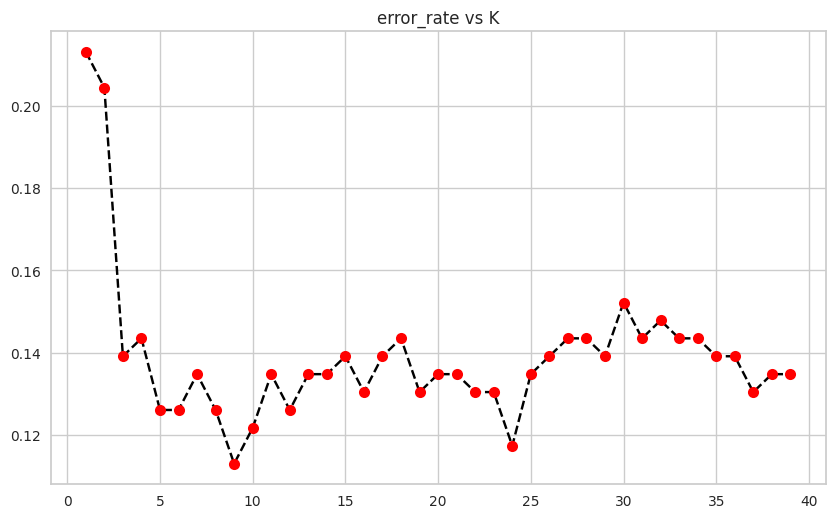

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black',linestyle='--',marker='o',markerfacecolor='red',markersize=8)
plt.title('error_rate vs K')
plt.xlabel='K'
plt.ylabel='error_rate'

#KNN model

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       108
           1       0.85      0.90      0.87       122

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



------------------------
Confusion Matrix
------------------------

[[ 88  20]
 [ 12 110]]


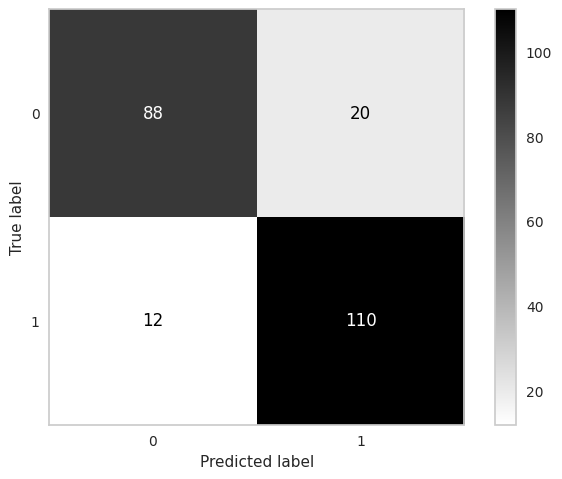

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

#Support Vector Classifier

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       108
           1       0.83      0.92      0.87       122

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



------------------------
Confusion Matrix
------------------------

[[ 85  23]
 [ 10 112]]


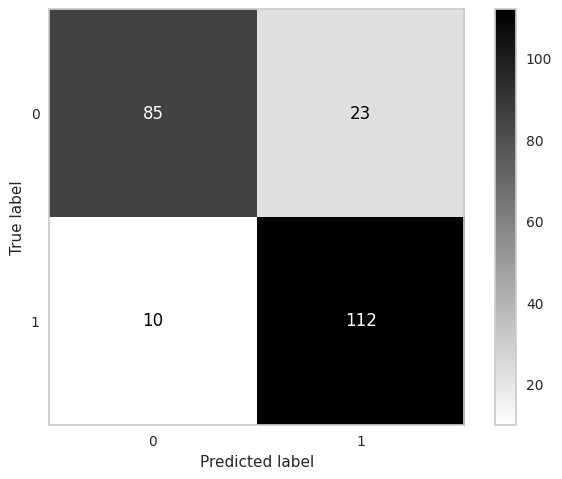

In [ ]:
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

#Parameter selectikon for Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=103,stop=300,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

In [ ]:
rf=RandomForestClassifier()
forest= RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
forest.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [103, 124, 146, 168,
                                                         190, 212, 234, 256,
                                                         278, 300]},
                   random_state=42, verbose=2)

In [ ]:
forest.best_params_

{'n_estimators': 234,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

#Random Forest Classifier

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        92
           1       0.86      0.87      0.87       138

    accuracy                           0.84       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230

------------------------
Confusion Matrix
------------------------

[[ 73  19]
 [ 18 120]]


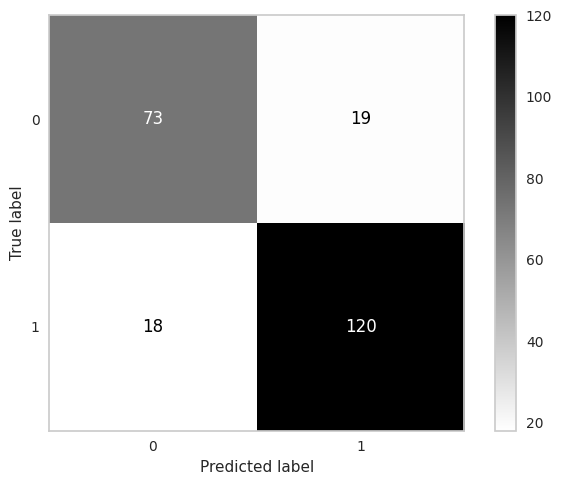

In [ ]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize a Random Forest Classifier with specific hyperparameter values
clf=RandomForestClassifier(n_estimators=234, min_samples_split=2,
                           min_samples_leaf=2, max_features='auto', max_depth=70, bootstrap=True)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Print a separation line
print('------------------------')

# Print the label for the confusion matrix
print('Confusion Matrix')

# Print another separation line
print('------------------------')

# Print an empty line
print('')

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap="binary")

# Turn off the grid lines
plt.grid(False)

# Show the plot
plt.show()

#Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        92
           1       0.86      0.88      0.87       138

    accuracy                           0.84       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230


------------------------
Confusion Matrix
------------------------

[[ 72  20]
 [ 17 121]]


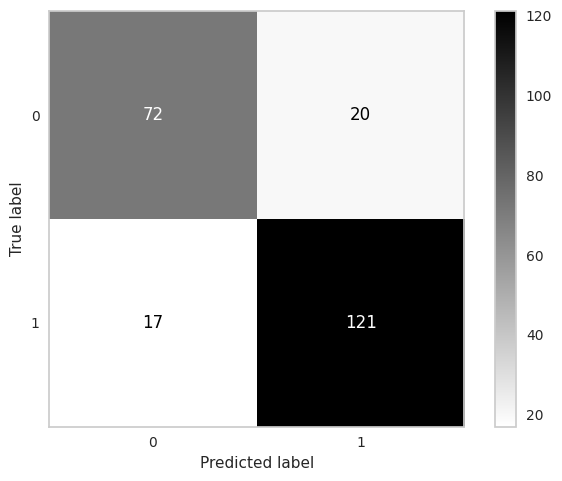

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7, max_depth=1, random_state=13)
clff.fit(X_train, y_train)
y_pred=clff.predict(X_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clff, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

#Conclusion
KNN model gives the accuracy of                   :         86%

Random forest givea the accuracy of               :         84%

Suport Vector Classifier gives the accuracy of    :         86%

Gradient Boosting Classifier gives the accuracy of: 84%